# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [80]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [81]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_weather['coord']['lat'], 
                          "Lng": city_weather['coord']['lon'], 
                          "Max Temp": city_weather['main']['temp_max'],
                          "Humidity": city_weather['main']['humidity'],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | pitimbu
Processing Record 4 of Set 1 | palmer
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | magadan
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | ghanzi
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | geidam
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | north bend
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | kavaratti
Processing Record 22 of Set 1 | aykhal
Processing Record 23 of S

In [82]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [83]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,36.18,69,89,2.75,IS,1715969981
1,klyuchi,52.2667,79.1667,57.42,43,14,7.81,RU,1715969981
2,pitimbu,-7.4706,-34.8086,75.79,80,46,7.72,BR,1715969981
3,palmer,42.1584,-72.3287,75.52,49,75,4.61,US,1715969981
4,saldanha,-33.0117,17.9442,60.85,89,95,12.71,ZA,1715969981


In [84]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,36.18,69,89,2.75,IS,1715969981
1,klyuchi,52.2667,79.1667,57.42,43,14,7.81,RU,1715969981
2,pitimbu,-7.4706,-34.8086,75.79,80,46,7.72,BR,1715969981
3,palmer,42.1584,-72.3287,75.52,49,75,4.61,US,1715969981
4,saldanha,-33.0117,17.9442,60.85,89,95,12.71,ZA,1715969981


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

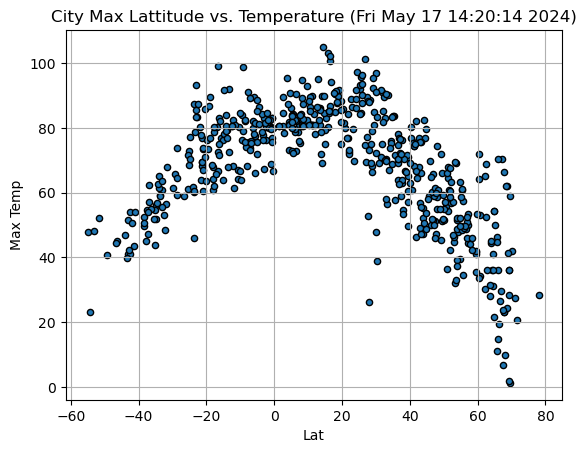

In [86]:
city_data_df.plot.scatter('Lat','Max Temp', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Temperature ({time.ctime()})')
plt.savefig("output_data/Fig1.png")
plt.show()

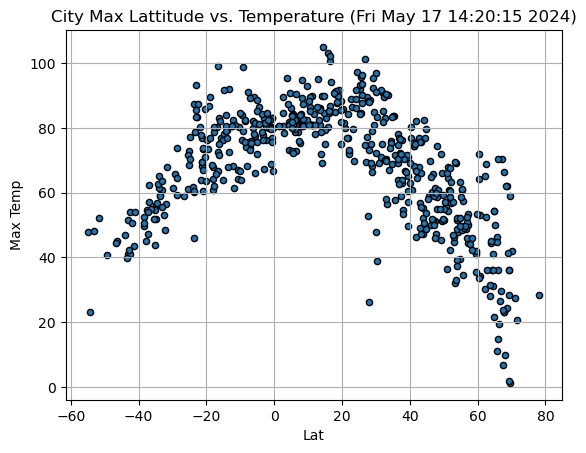

In [87]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Max Temp', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Temperature ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

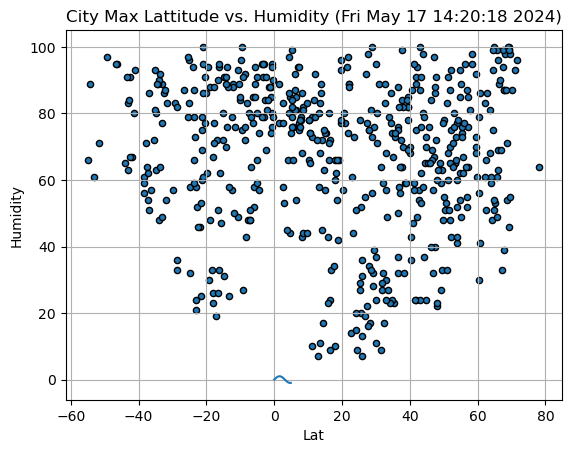

In [88]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Humidity', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Humidity ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
# Show plot
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()
plt.show()

#### Latitude Vs. Cloudiness

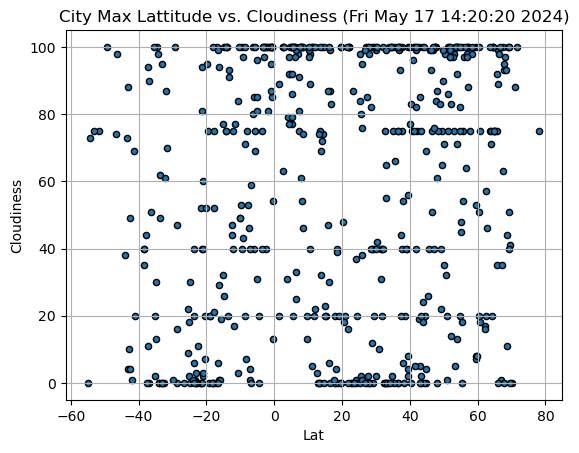

In [89]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Cloudiness', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Cloudiness ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

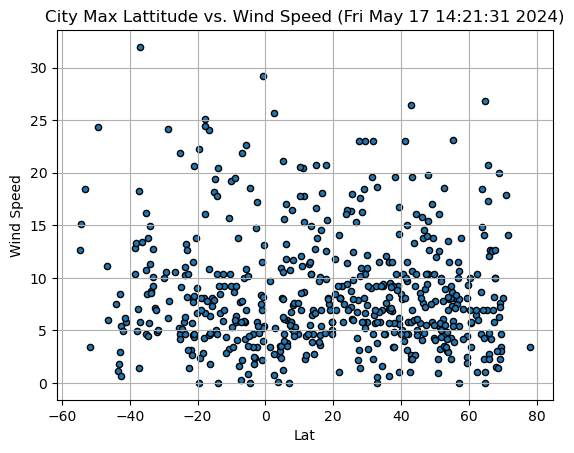

In [90]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot.scatter('Lat','Wind Speed', grid=True, edgecolor='black', title=f'City Max Lattitude vs. Wind Speed ({time.ctime()})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
def plot_LR(x, y, title):
    lr = linregress(x,y)
    print(f'The r-value is: {lr.rvalue}')
    
    plt.figure(figsize=[14,6])
    
    plt.scatter(x,y, edgecolor='black')
    plt.title(f'Latitude vs. {title} ({time.ctime()})')
    plt.ylabel(title)
    plt.xlabel('Latitude')
    plt.grid()
    
    plt.plot(x, x*lr.slope+lr.intercept, c='r', linewidth=3)
    
    plt.annotate(f'y = {lr.slope:.2f}x* + {lr.intercept:.2f}', [x.min(), y.min()], c='r', fontsize=18)
    
    plt.savefig(f'output_data/Latitude_vs_{title}.png')

In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,36.18,69,89,2.75,IS,1715969981
1,klyuchi,52.2667,79.1667,57.42,43,14,7.81,RU,1715969981
3,palmer,42.1584,-72.3287,75.52,49,75,4.61,US,1715969981
5,albany,42.6001,-73.9662,76.78,54,100,1.01,US,1715969970
7,magadan,59.5667,150.8000,41.52,73,8,2.51,RU,1715969981


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7994367142709133


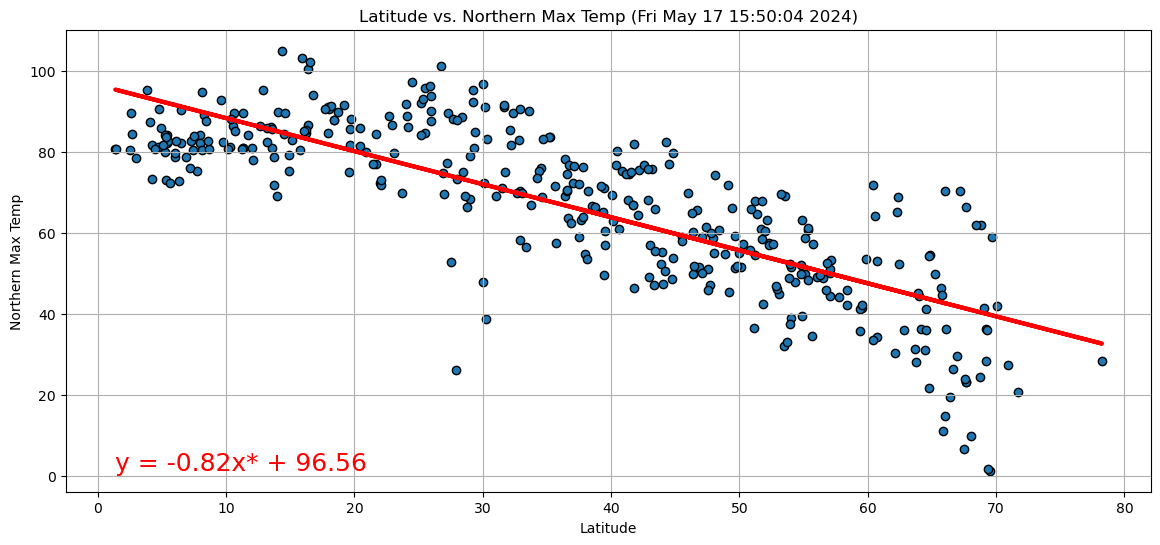

In [126]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Max Temp']
title = 'Northern Max Temp'

plot_LR(x,y,title)

The r-value is: 0.7801413558954823


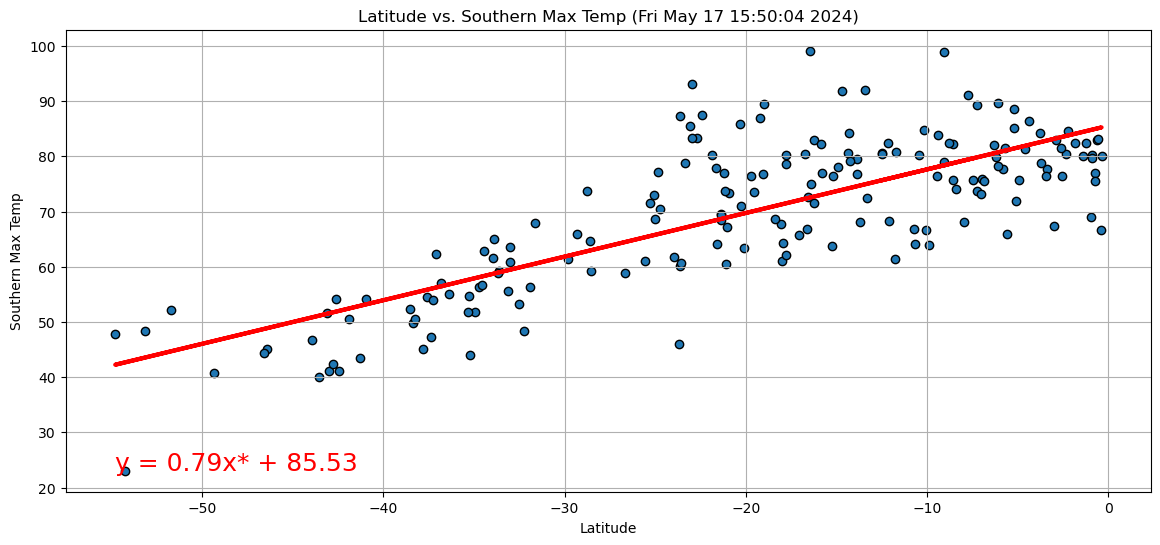

In [127]:
# Linear regression on Southern Hemishpere
southern_hemi_df = city_data_df[city_data_df.Lat<0]

x = southern_hemi_df.Lat
y = southern_hemi_df['Max Temp']
title = 'Southern Max Temp'

plot_LR(x,y,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09114907125080664


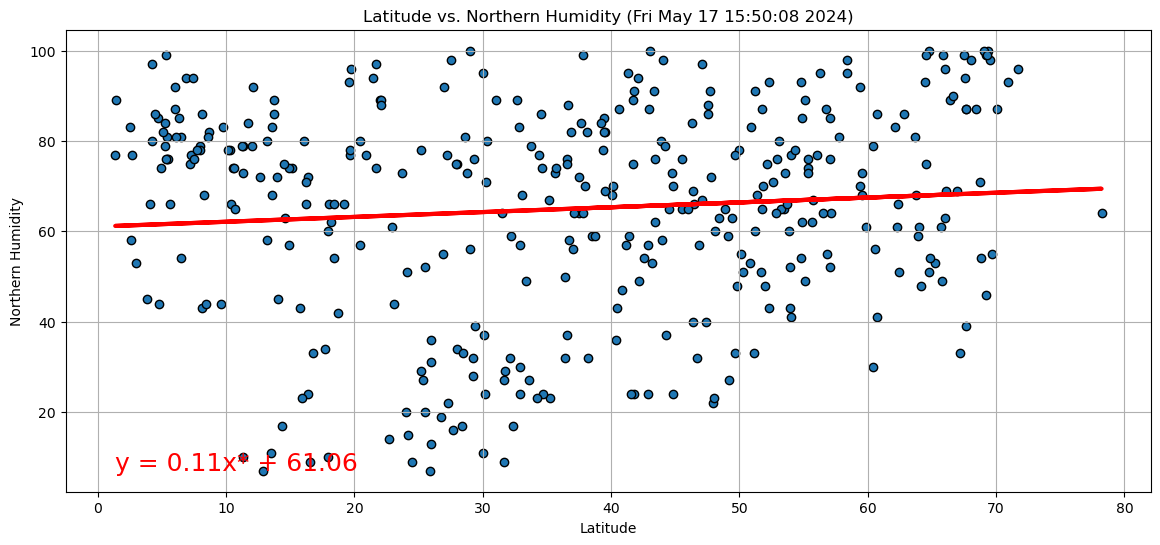

In [128]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Humidity']
title = 'Northern Humidity'

plot_LR(x,y,title)

The r-value is: 0.05624794854376696


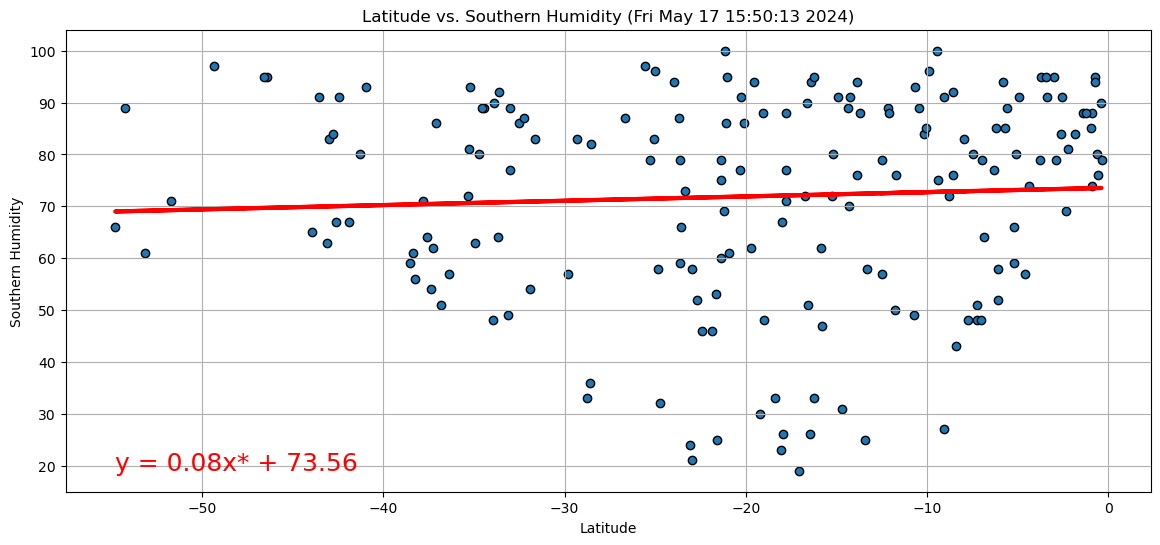

In [130]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df.Humidity
title = 'Southern Humidity'

plot_LR(x,y,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03581290653596381


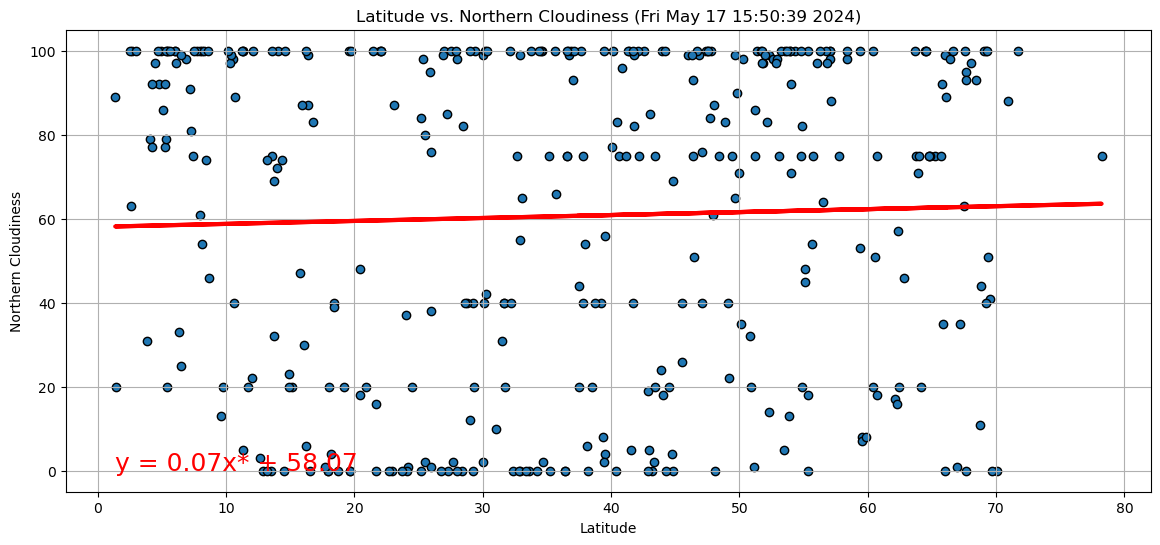

In [131]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Cloudiness']
title = 'Northern Cloudiness'

plot_LR(x,y,title)

The r-value is: 0.2585695752051111


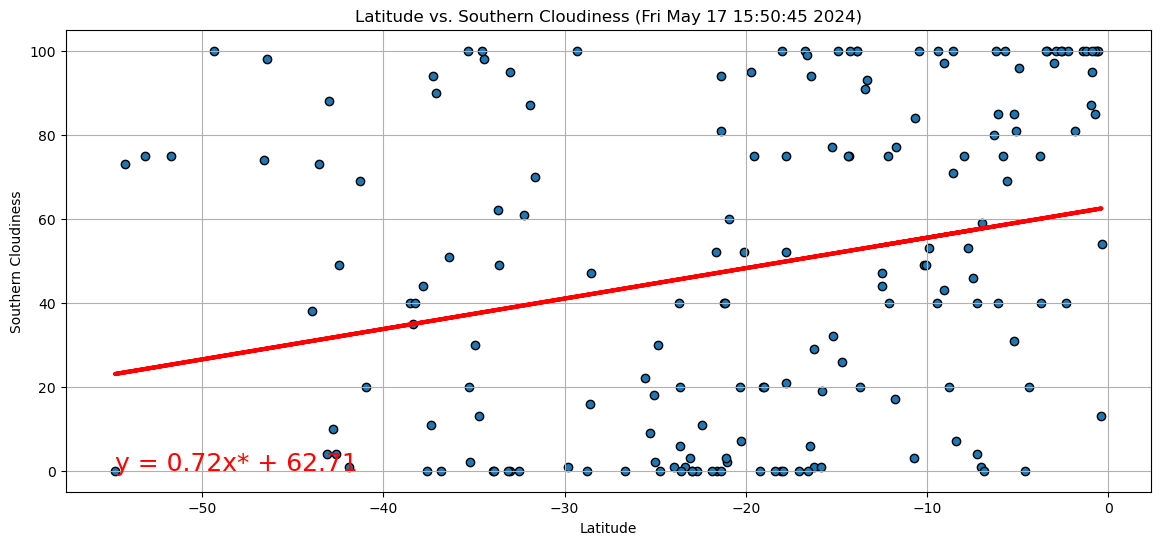

In [133]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df['Cloudiness']
title = 'Southern Cloudiness'

plot_LR(x,y,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0489396521507341


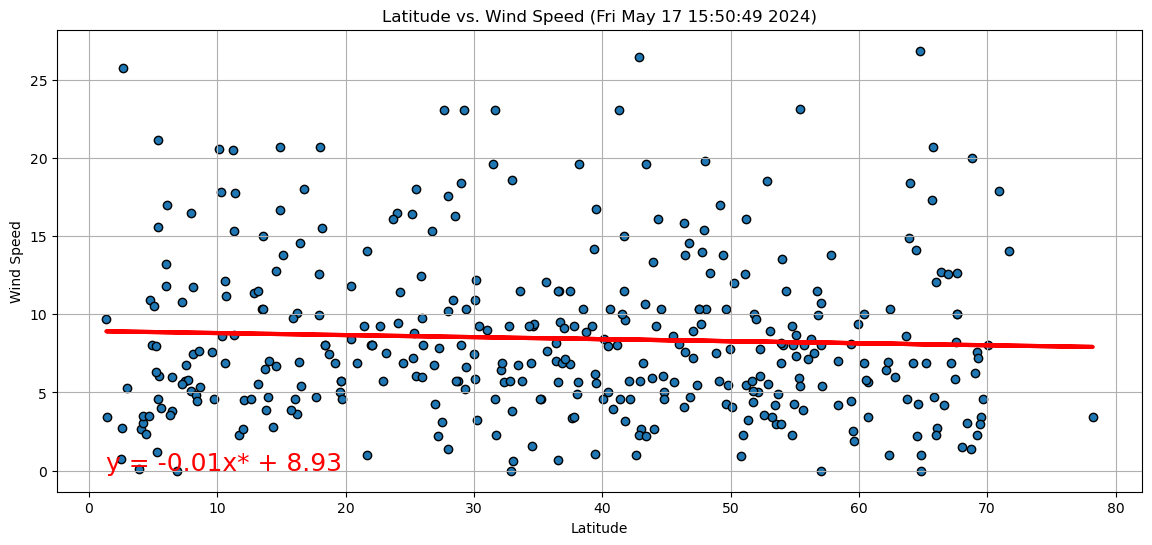

In [134]:
# Northern Hemisphere
x = northern_hemi_df.Lat
y = northern_hemi_df['Wind Speed']
title = 'Wind Speed'

plot_LR(x,y,title)

The r-value is: -0.09010407130478289


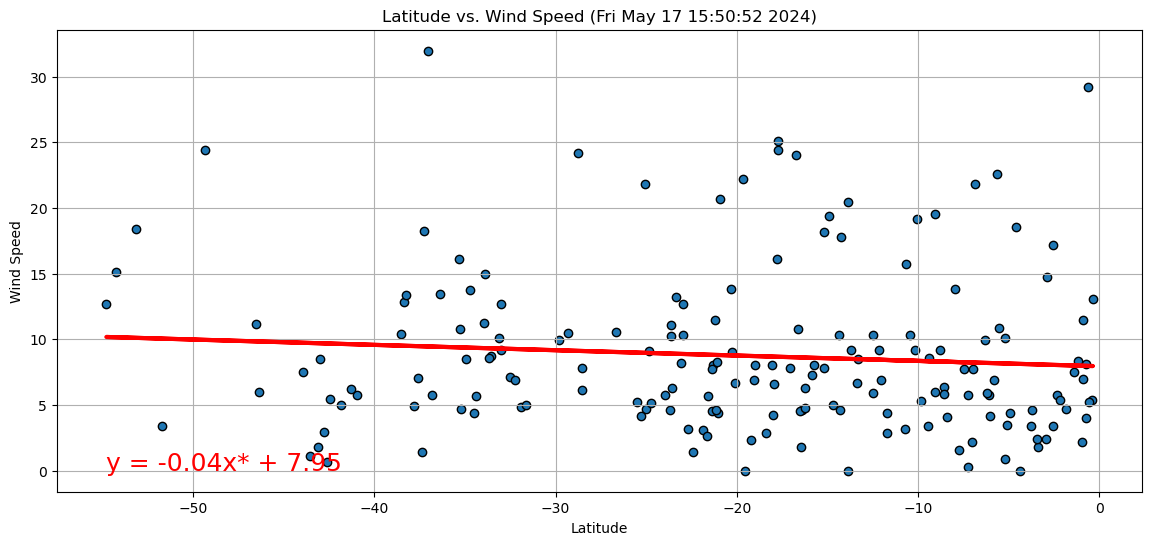

In [135]:
# Southern Hemisphere
x = southern_hemi_df.Lat
y = southern_hemi_df['Wind Speed']
title = 'Wind Speed'

plot_LR(x,y,title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is very little correlation between latitude and cloudiness, humidity and windspeed. But there is a strong correlation between latitude and temperature. The northern hemisphere has a negative correlation with temperature. The southern hemisphere has a positive correltaion.   